<a href="https://colab.research.google.com/github/hsargoli/MyWorks/blob/main/imagePRocessing_from_zero.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Hi, my name is Hosein Sargoli and I would like to share my knowledge with you

I would be pleased to hear from you. and make project.

# Basic 
**read / present / what is an image for us?**

[Text(0.5, 1.0, 'Pillow')]

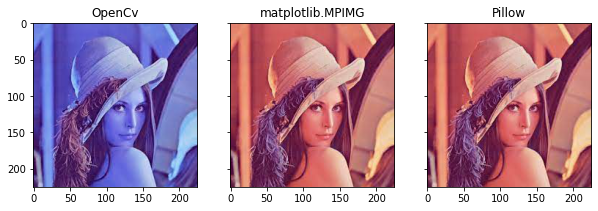

In [25]:
# ...... 
# ..................
# READ and SHOW ....   
# ..................
# ...... ```````````

# ````````````````````````````````````````````````````````````````````````````
# we need to open an image 

Image_Path =  'drive/MyDrive/1.jpg'
import cv2
img0 = cv2.imread(Image_Path)

import matplotlib.image as mpimg 
import matplotlib.pyplot as plt
img1 = mpimg.imread(Image_Path)
				  
from PIL import Image
img2 = Image.open(Image_Path)

# ````````````````````````````````````````````````````````````````````````````
# want to see it ?

figure,ax = plt.subplots(nrows = 1, ncols = 3, sharey=True,figsize =(10,10))
ax[0].imshow(img0); ax[0].set(title = 'OpenCv')
ax[1].imshow(img1); ax[1].set(title = 'matplotlib.MPIMG')
ax[2].imshow(img2); ax[2].set(title = 'Pillow')

# what the hell. Why does opencv open images in such a way ?

# TODO : explain (BGR) and (gray) image. better place info in my website

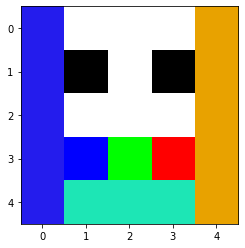

shape: (5, 5, 3) 
 red matrix
[[237 255 255 255   0]
 [237   0 255   0   0]
 [237 255 255 255   0]
 [237 255   0   0   0]
 [237 181 181 181   0]]        
green matric
[[ 28 255 255 255 162]
 [ 28   0 255   0 162]
 [ 28 255 255 255 162]
 [ 28   0 255   0 162]
 [ 28 230 230 230 162]]
blue matrix
[[ 36 255 255 255 232]
 [ 36   0 255   0 232]
 [ 36 255 255 255 232]
 [ 36   0   0 255 232]
 [ 36  29  29  29 232]]


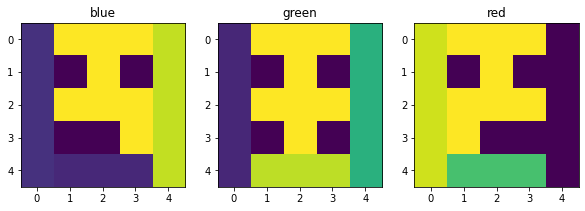

In [56]:
# what is a digital image ?
# it is a tensor of rank 3
# it contain 3 matrix 
# each matrics for certain color. red green blue RGB
vsi = cv2.imread('verySimpleImage.png')
plt.imshow(vsi)
plt.show()
print(f'shape: {vsi.shape} \n red matrix\n{vsi[:,:,2]} \
       \ngreen matrix\n{vsi[:,:,1]}\nblue matrix\n{vsi[:,:,0]}')
# each image matrix values 0 to 255
# 0 to black
# 255 The maximum amount of color 
# if in 3 matrix some pixle has 255 for every color it become white
colorr = ['blue', 'green', 'red']
fig,ax =plt.subplots(1,3,figsize = (10,10))
for i in range(3):
  ax[i].imshow(vsi[:,:,i])
  ax[i].set(title = colorr[i])


In [ ]:
# https://data-flair.training/blogs/cartoonify-image-opencv-python/
import cv2 #for image processing
import easygui #to open the filebox
import numpy as np #to store image
import imageio #to read image stored at particular path

import sys
import matplotlib.pyplot as plt
import os
import tkinter as tk
from tkinter import filedialog
from tkinter import *
from PIL import ImageTk, Image

def upload():
    ImagePath=easygui.fileopenbox()
    cartoonify(ImagePath)


def cartoonify(ImagePath):
    # read the image
    originalmage = cv2.imread(ImagePath)
    originalmage = cv2.cvtColor(originalmage, cv2.COLOR_BGR2RGB)
    #print(image)  # image is stored in form of numbers

    # confirm that image is chosen
    if originalmage is None:
        print("Can not find any image. Choose appropriate file")
        sys.exit()

    ReSized1 = cv2.resize(originalmage, (960, 540))
    #plt.imshow(ReSized1, cmap='gray')


    #converting an image to grayscale
    grayScaleImage= cv2.cvtColor(originalmage, cv2.COLOR_BGR2GRAY)
    ReSized2 = cv2.resize(grayScaleImage, (960, 540))
    #plt.imshow(ReSized2, cmap='gray')


    #applying median blur to smoothen an image
    smoothGrayScale = cv2.medianBlur(grayScaleImage, 5)
    ReSized3 = cv2.resize(smoothGrayScale, (960, 540))
    #plt.imshow(ReSized3, cmap='gray')

    #retrieving the edges for cartoon effect
    #by using thresholding technique
    getEdge = cv2.adaptiveThreshold(smoothGrayScale, 255, 
        cv2.ADAPTIVE_THRESH_MEAN_C, 
        cv2.THRESH_BINARY, 9, 9)

    ReSized4 = cv2.resize(getEdge, (960, 540))
    #plt.imshow(ReSized4, cmap='gray')

    #applying bilateral filter to remove noise 
    #and keep edge sharp as required
    colorImage = cv2.bilateralFilter(originalmage, 9, 300, 300)
    ReSized5 = cv2.resize(colorImage, (960, 540))
    #plt.imshow(ReSized5, cmap='gray')


    #masking edged image with our "BEAUTIFY" image
    cartoonImage = cv2.bitwise_and(colorImage, colorImage, mask=getEdge)

    ReSized6 = cv2.resize(cartoonImage, (960, 540))
    #plt.imshow(ReSized6, cmap='gray')

    # Plotting the whole transition
    images=[ReSized1, ReSized2, ReSized3, ReSized4, ReSized5, ReSized6]

    return images
    
import cv2 
a = cv2.imread(r'drive/MyDrive/1.jpg')
b = cartoonify(r'drive/MyDrive/1.jpg')
fig, axes = plt.subplots(3,2, figsize=(8,8), subplot_kw={'xticks':[], 'yticks':[]}, gridspec_kw=dict(hspace=0.1, wspace=0.1))
for i, ax in enumerate(axes.flat):
    ax.imshow(b[i], cmap='gray')

       
